# Comparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE, ADASYN

np.random.seed(123)

df = pd.read_csv("creditcard.csv") 

# definimos las clases
y = df['Class']
X = df.drop('Class', axis=1)
X = X.to_numpy()

Visualizacion de datos

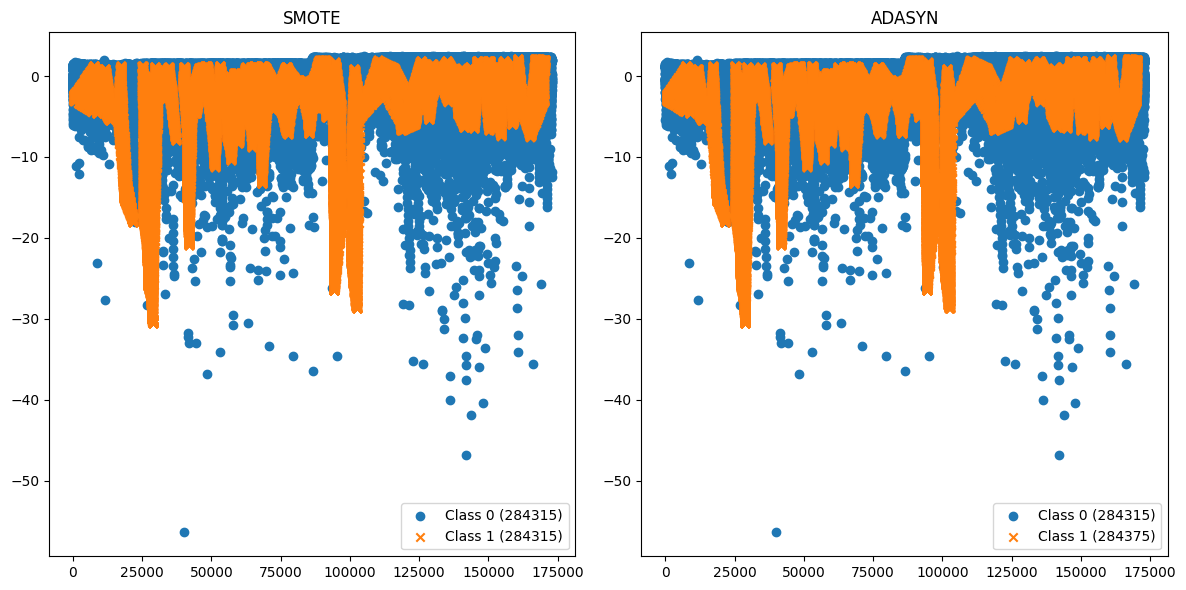

In [2]:
plt.figure(figsize=(12, 6))

# vecinos
k = 10

# aplicamos SMOTE
smote = SMOTE(k_neighbors=k, random_state=448)
X_smote, y_smote = smote.fit_resample(X,y)

# Separa los datos en dos clases
X_class_0 = X_smote[y_smote == 0]
X_class_1 = X_smote[y_smote == 1]


plt.subplot(1, 2, 1)
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label=f'Class 0 ({len(X_class_0)})', marker='o')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label=f'Class 1 ({len(X_class_1)})', marker='x')
plt.title('SMOTE')
plt.legend()

# aplicamos ADASYN
adasyn = ADASYN(n_neighbors=k, random_state=448)
X_adasyn, y_adasyn = adasyn.fit_resample(X,y)

# Separa los datos en dos clases
X_class_0 = X_adasyn[y_adasyn == 0]
X_class_1 = X_adasyn[y_adasyn == 1]


plt.subplot(1, 2, 2)
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label=f'Class 0 ({len(X_class_0)})', marker='o')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label=f'Class 1 ({len(X_class_1)})', marker='x')
plt.title('ADASYN')
plt.legend()


plt.tight_layout()
plt.show()